In [5]:
from transformers import pipeline
from PIL import Image
import os

# 用于科研绘图，将 depth 结果可视化
import matplotlib.pyplot as plt


def load_pipe(*, task, model, model_path):
    """
    如果本地有保存模型.safeTensor文件就读取，否则加载模型并保存
    Args:
        task: 任务类型，如 depth-estimation
        model: 选择的模型，如 depth-anything/Depth-Anything-V2-Small-hf
        model_path: 模型保存路径
    """
    if os.path.exists(model_path):
        pipe = pipeline(task=task, model=model_path)
    else:
        pipe = pipeline(task=task, model=model)
        pipe.save_pretrained(model_path)

    return pipe

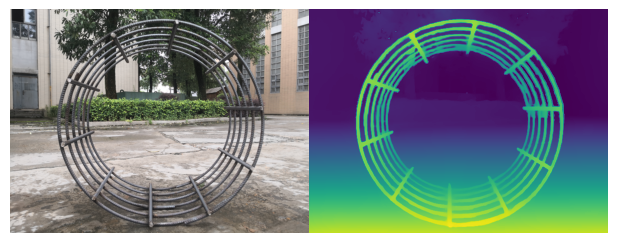

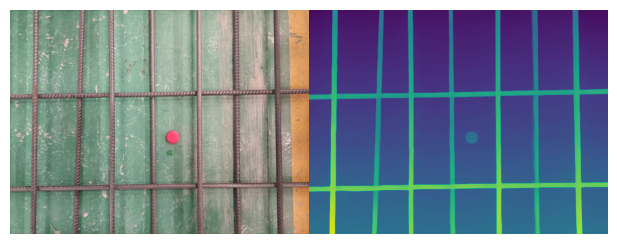

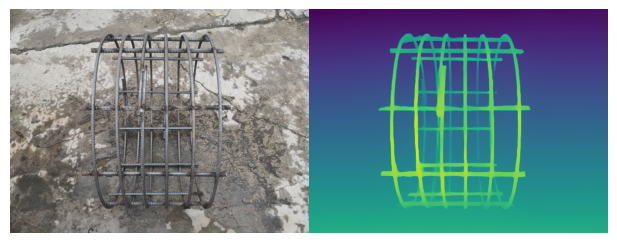

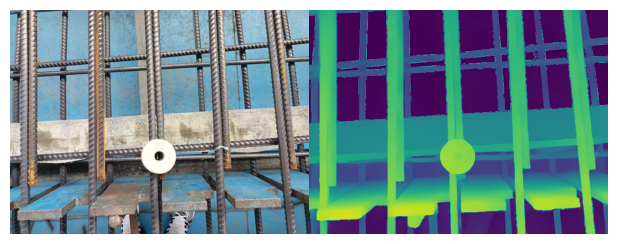

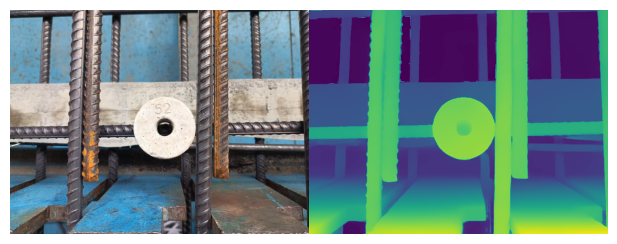

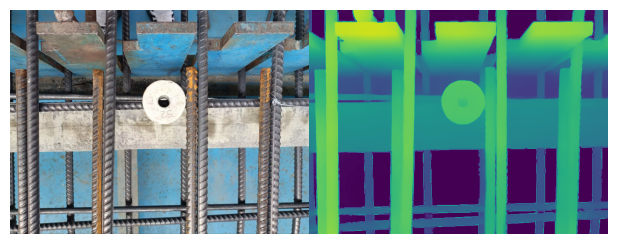

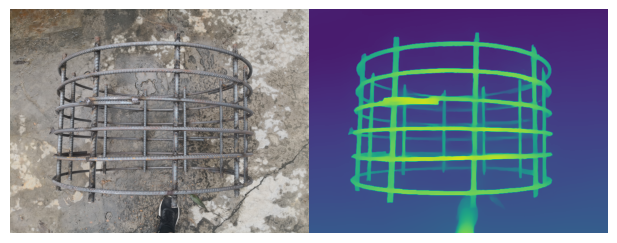

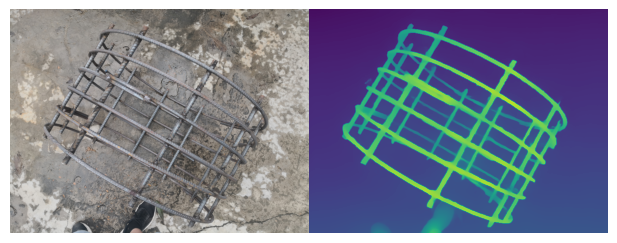

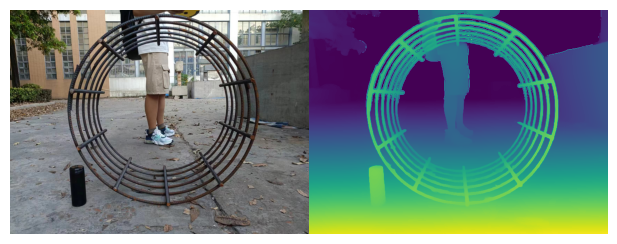

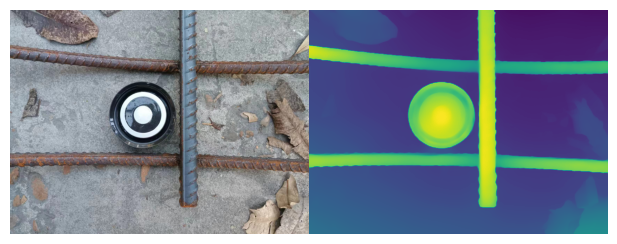

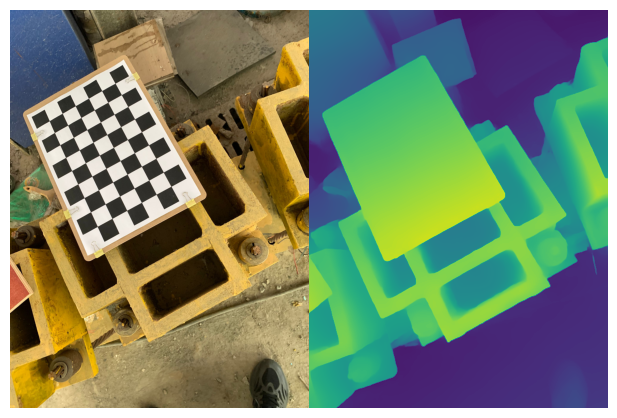

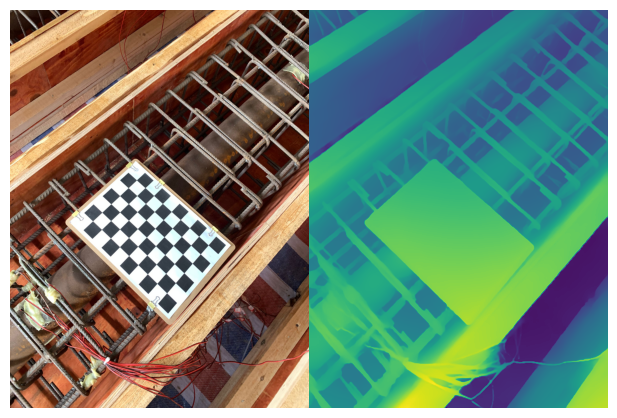

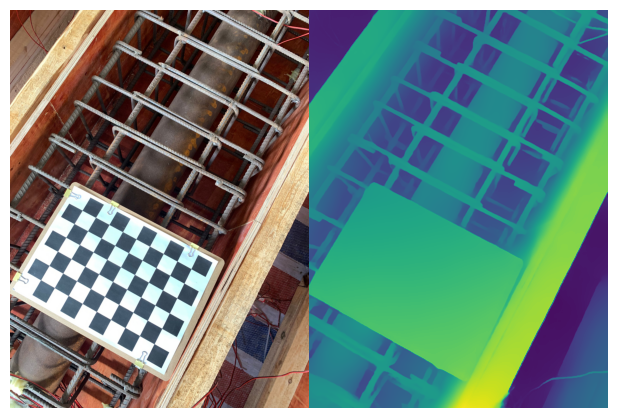

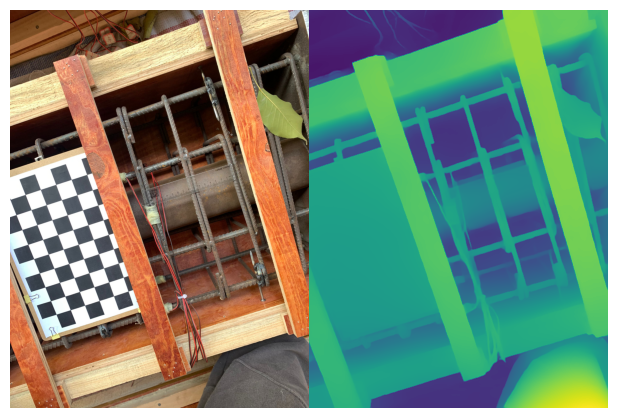

In [16]:

# load pipe: 加载模型和模型参数，以下是如果本地有保存模型.safeTensor文件就读取，否则加载模型并保存
pipe = load_pipe(
    task="depth-estimation",                            # 任务类型，选择深度估计就用这个
    model="depth-anything/Depth-Anything-V2-Small-hf",  # 选择的模型，选择 DepthAnythingV2 模型，就用这个
    model_path="./models/Depth-Anything-V2-Small-hf"    # 模型本地保存路径
)

# 加载文件夹下的所有图片，并使用模型进行推理
dir_name = r'./figures/img'
for image_name in os.listdir(dir_name):
    # load image: 加载图像
    image_path = os.path.join(dir_name, image_name)
    image = Image.open(image_path)
    
    # inference: 模型推理
    depth = pipe(image)["depth"]
    
    # show result: 显示结果
    fig, axes = plt.subplots(1, 2)
    fig: plt.Figure = fig
    axes: list[plt.Axes] = axes
    plt.tight_layout(pad=0., w_pad=0., h_pad=0.)    # 调整子图间距
    plt.subplots_adjust(wspace=0., hspace=0.)       # 调整子图间距
    axes[0].imshow(image)
    axes[0].axis('off')
    axes[1].imshow(depth)
    axes[1].axis('off')
    
    # save result: 保存可视化结果
    # == 保存图像的科研绘图版结果 ==
    save_path = os.path.join(r"./figures/depth", image_name)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    plt.imsave(save_path, depth)
    # == 保存模型输出的灰度图结果 ==
    save_path = os.path.join(r"./figures/depth-gray", image_name)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    depth.save(save_path)
    # == 保存原图和结果图的对比图 ==
    save_path = os.path.join(r"./figures/depth-comparison", image_name)
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    fig.savefig(save_path, dpi=250)